# Creating input for CraFT
This notebook is there to create input for CraFT

In [22]:
import AITAToolbox.loadData_aita as lda
import matplotlib.pyplot as plt
import datetime
import os
import shutil
%matplotlib widget

## Load AITA data

In [23]:
# path to AITA data
adr_aita='/home/alletn/Documents/Data/CI06/AITA/CI06_BD/CI06_BD_aita.dat'
# path to corrected micro
adr_micro='/home/alletn/Documents/Data/CI06/AITA/CI06_BD/CI06_BD_micro.bmp'

# Load the data
data=lda.aita5col(adr_aita,micro_adress=adr_micro)

Sucessfull aita build !


# Crop the data

In [24]:
lim=data.interactive_crop()

1. click and drag the mouse on the figure to selecte the area
2. you can draw the rectangle using the button "Draw area"
3. if you are unhappy with the selection restart to 1.
4. if you are happy with the selection click on "Export crop" (only the last rectangle is taken into account)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Button(description='Draw area', style=ButtonStyle())

Button(description='Export crop', style=ButtonStyle())

In [25]:
print('crop: '+ str(lim.pos))

crop: [ 199 4337  246 4386]


In [26]:
%matplotlib inline

# Rotate the sample 
**This is just need for CI02** because it was not place correctly in the analyser for the other it should be fine.

In [27]:
#data.rot180()

## Resize for CraFT
We want to resize to have a smaller resolution to make CraFT simulation faster. A resolution of 0.15 mm is choosen for this study. It could be parameter on which we play be it is probably not the most interesting.

## Controle microstcuture
The point here is to control if the grains are well segmented or if the crop need to be smaller.

  0%|          | 0/4140 [00:00<?, ?it/s]

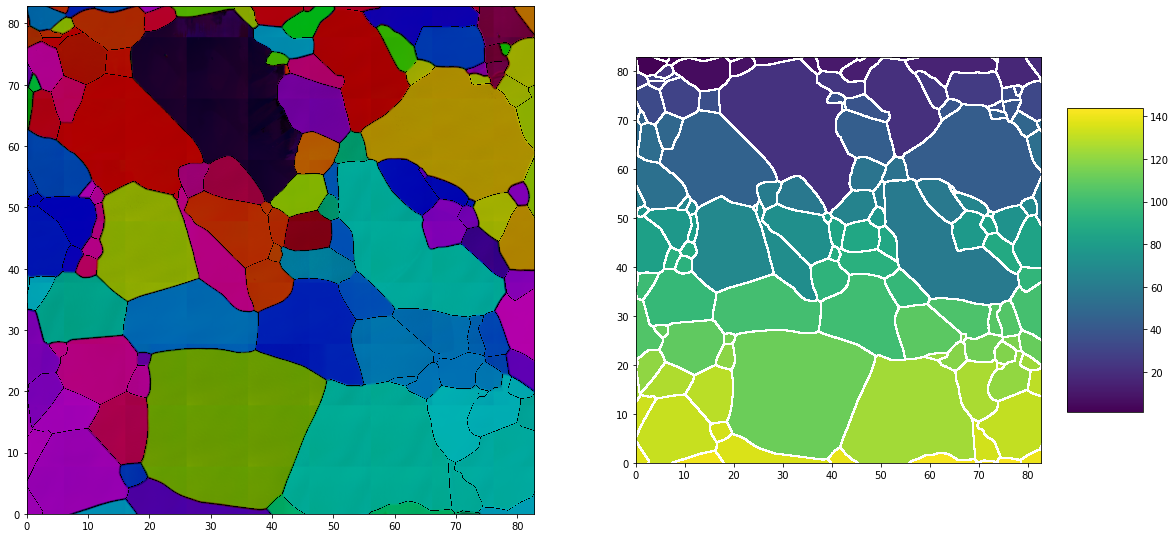

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(121)
data.plot(semi=True)
data.micro.plotBoundary(dilatation=2)
plt.subplot(122)
data.grains.plot()

## Filter bad data
We remove all the data with a quality [0 100] factor less than 75

In [29]:
data.filter(75)

## Average one orientation per grain
**Note** On this image you can look if the color match the figure above. If not it means that some grain boundary are discontinous. Therefore you need to crop more or to redo the microstructure draw.

**Warning** Average need to be done before resize because the microstructure is not continous anymore after resize (may be we could correct this).

In [30]:
data.mean_grain()

  0%|          | 0/145 [00:00<?, ?it/s]

/home/alletn/Softwares/gitconda/aita/AITAToolbox/aita.py:212: RuntimeWarning: invalid value encountered in remainder
  azi=np.mod(self.phi1.field[idx[0],idx[1]]-math.pi/2,2*math.pi)


## Resize for CraFT
We want to resize to have a smaller resolution to make CraFT simulation faster. A resolution of 0.15 mm is choosen for this study. It could be parameter on which we play be it is probably not the most interesting.

In [31]:
data.imresize(0.15)

  0%|          | 0/552 [00:00<?, ?it/s]

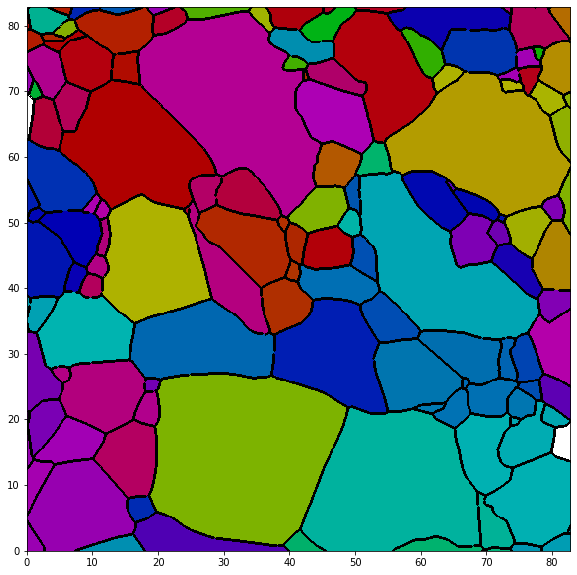

In [32]:
plt.figure(figsize=(10,10))
data.plot(semi=True)
data.micro.plotBoundary(dilatation=1)

## Export CraFT input + log

In [36]:
# Path to export
adr_craft='/home/alletn/Documents/Data/CI06/CraFT/log'
# name of simulation
name_craft='CI06'

In [37]:
cwd = os.getcwd()
os.mkdir(adr_craft)
os.chdir(adr_craft)

In [38]:
# Export CraFT input file
data.craft(name_craft)

In [39]:
rm *.in *.load *.output

## Export the .log

In [40]:
list(lim.pos)

[199, 4337, 246, 4386]

In [41]:
f = open(name_craft+'.log', "a")
f.write('Dim:'+str(data.phi1.field.shape)+'\n')
f.write('Res:'+str(data.phi1.res)+'\n')
f.write('Crop :'+str(lim.pos)+'\n')            
f.write('Build: '+str(datetime.date.today()))
f.close()

In [42]:
os.chdir(cwd)

## Export pdf## Export pdf

In [43]:
!jupyter nbconvert --to html --TemplateExporter.exclude_input=False Build_CraFT_input.ipynb

[NbConvertApp] Converting notebook Build_CraFT_input.ipynb to html
[NbConvertApp] Writing 626728 bytes to Build_CraFT_input.html


In [44]:
shutil.move("Build_CraFT_input.html", adr_craft+'/'+name_craft+'_CraFT_input.html')

'/home/alletn/Documents/Data/CI06/CraFT/log/CI06_CraFT_input.html'